# Capstone Project — The Battle of Neighbourhoods
## Introduction

<i>CHENNAI is the capital of TamilNadu. It is one of the most important metros in India. The population of Chennai is around 70.9 lakhs.
The region around Chennai has served as an important administrative, military, and economic centre for many centuries.Chennai is located on the south–eastern coast of India in the north–eastern part of Tamil Nadu on a flat coastal plain known as the Eastern Coastal Plains.attracts many visitors either as tourists or as part of its large workforce. The vast majority claim Chennai is one of the best cities in India. 

<i>Its rich and vibrant culture is reflective of its varied food palate. The capital of Tamil Nadu has a wide array of street foods.There are many restaurants here, of varied cuisines (Chinese , Italian , French etc.,).</i>

So as part of this project , we will list and visualise all major parts of Chennai .</i>

### Possible questions that can be asked are as follows: 

<b>WHAT ARE THE:</b>

<i>1.Highest rated resturants in top 10 locality of Chennai?</i>

<i>2.Worst rated resturants in top 10 locality of Chennai?</i>

<i>3.Top 10 most voted restaurant in Chennai?</i>

<i>4.Most lowest votes in top 10 locality of Chennai?</i>

<i>5.highest number of Restaurant available in a Locality - Chennai?</i>

<i>6.lowest number of Restaurant in a Locality - Chennai?</i>

<i>7.BEST places for North Indian Cuisine in Chennai?</i>

<i>8.WORST places for North Indian Cuisine in Chennai?</i>


### Data:

<B>For this project we need the following data :</B>

<i>Chennai Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.</i>

*Data source : <a>Zomato kaggle dataset</a>*

*Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.*

*Data source : <a>Fousquare API</a>*

*Description : By using this api we will get all the venues in each neighborhood.*



### Import your libraries!

In [56]:
import numpy as np
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
! pip install geocoder
import geocoder

Solving environment: done

# All requested packages already installed.



In [68]:
from bs4 import BeautifulSoup
print("Imported!")

Imported!


In [70]:
url = "https://raw.githubusercontent.com/sharanyasadan/Capstoneproject/master/ZomatoChennai.csv"
extracting_data = requests.get(url).text
df_Ch = BeautifulSoup(extracting_data, 'lxml')

In [72]:
df_Ch

<html><body><p>PK-    �h�P5���������  Zomato Chennai Listing 2020.csv  ��6     a
     Ľ[s�H�5��f�`z�1J�ܧ��)e�RJ��R��|z���$H�B*�_w�; AJ5c�])@��������J�l�z��o�2��g�&gt;�7���j��fY����t�6q��/�8�W������q&gt;�r�.�����f^����Ջw7�^�W�EZ�?GI�e[u��Z�u�M���_��f��?��ooo������4]�N��j���-c�2��xE�`��[���0X�$a�,cK���n�-�9��?�:�������nX���S6�;�F�ȉo����8�'|z�O�E����%o��}����|L�G/o��&amp;�o1�0��K�~�Ļ��떏�~k������=�7��Ӊ�k�~k���:~��N��_�k
����}5KA.��޽w&gt;�b�(&amp;0Y�$�����?����I��޼��{ߓ������Ma6��xCKF�������6b�w��y��d�t�{g�3��ˑ=�8
�i��{�b�3�2O���j�mr&gt;��{�r�4|J=ۓ��|�@��̙�{�,�\���$޲,��O��z#�#�;�6H�%��,��(x��&amp;I�M��,�,��,�)�6C���-'l���{_�
�W�TG��Ngbɦ�F���z���&amp;��E��%���wY�f��]��24G�����r������\E
�f"��o��*���fW��[+a�.A�{��I�a�W#��Ŵx�k�b�	,����@�U�6˼[��`kZ�em�]4�Gфy_�|
�!����K�T�K���d9H/Mg�|�(ӯ���ߟ��/��?��h�a�
�M���fޟk���#?����m��l�E��=�8�]�a��N�����wp�$�{�d��f����3{�ݳ��
�
6s��kM��~&amp;���9{cْ+�///���hƯ�S�=.����p���-���`�`�`�h;��y���aj�j�L���xߟ����Oa������̊y��uAG�~��tc~�8-���|������[�l�q��}�r8��

In [74]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Chennai']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,69024,That Madras Place,1,Chennai,"34/29, 2nd Main Road, Kasturibai Nagar, Adyar,...",Adyar,"Adyar, Chennai",80.250744,13.005801,"European, Italian, Desserts",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,1810
1,72475,Haunted,1,Chennai,"273, F13, New Number 71, 2nd Main Road, Anna N...",Anna Nagar East,"Anna Nagar East, Chennai",80.220672,13.086438,"North Indian, Chinese, Arabian",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,3.8,Yellow,Good,519
2,70431,Pantry d'or,1,Chennai,"21/11, J Block, 6th Avenue Main Road, Anna Nag...",Anna Nagar East,"Anna Nagar East, Chennai",80.219104,13.091809,"Continental, Cafe, Italian, Desserts",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.4,Green,Very Good,1504
3,71443,Palmshore,1,Chennai,"95, Jawaharlal Nehru Salai, Jafferkhanpet, Ash...",Ashok Nagar,"Ashok Nagar, Chennai",80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,841
4,73088,Chili's,1,Chennai,"49 & 50 L, Express Avenue Mall, White's Road, ...","Express Avenue Mall, Royapettah","Express Avenue Mall, Royapettah, Chennai",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.8,Dark Green,Excellent,1262


In [85]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Restaurant ID','Address','City','Locality','Longitude','Latitude','Cuisines','Has Table booking','Aggregate rating','Rating text','Votes']]

In [86]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [87]:
df_Res.head()

,Restaurant Name,Restaurant ID,Address,City,Locality,Longitude,Latitude,Cuisines,Has Table booking,Aggregate rating,Rating text,Votes
0,That Madras Place,69024,"34/29, 2nd Main Road, Kasturibai Nagar, Adyar,...",Chennai,Adyar,80.250744,13.005801,"European, Italian, Desserts",Yes,4.2,Very Good,1810
1,Haunted,72475,"273, F13, New Number 71, 2nd Main Road, Anna N...",Chennai,Anna Nagar East,80.220672,13.086438,"North Indian, Chinese, Arabian",Yes,3.8,Good,519
2,Pantry d'or,70431,"21/11, J Block, 6th Avenue Main Road, Anna Nag...",Chennai,Anna Nagar East,80.219104,13.091809,"Continental, Cafe, Italian, Desserts",Yes,4.4,Very Good,1504
3,Palmshore,71443,"95, Jawaharlal Nehru Salai, Jafferkhanpet, Ash...",Chennai,Ashok Nagar,80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",Yes,4.2,Very Good,841
4,Chili's,73088,"49 & 50 L, Express Avenue Mall, White's Road, ...",Chennai,"Express Avenue Mall, Royapettah",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",Yes,4.8,Excellent,1262


### Create a Map!

In [88]:
Chennai_Rest = folium.Map(location=[13.0827, 80.2707], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Chennai_Rest)  

Chennai_Rest

In [89]:
df_Res.head()

,Restaurant Name,Restaurant ID,Address,City,Locality,Longitude,Latitude,Cuisines,Has Table booking,Aggregate rating,Rating text,Votes,Cluster
0,That Madras Place,69024,"34/29, 2nd Main Road, Kasturibai Nagar, Adyar,...",Chennai,Adyar,80.250744,13.005801,"European, Italian, Desserts",Yes,4.2,Very Good,1810,3
1,Haunted,72475,"273, F13, New Number 71, 2nd Main Road, Anna N...",Chennai,Anna Nagar East,80.220672,13.086438,"North Indian, Chinese, Arabian",Yes,3.8,Good,519,4
2,Pantry d'or,70431,"21/11, J Block, 6th Avenue Main Road, Anna Nag...",Chennai,Anna Nagar East,80.219104,13.091809,"Continental, Cafe, Italian, Desserts",Yes,4.4,Very Good,1504,4
3,Palmshore,71443,"95, Jawaharlal Nehru Salai, Jafferkhanpet, Ash...",Chennai,Ashok Nagar,80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",Yes,4.2,Very Good,841,2
4,Chili's,73088,"49 & 50 L, Express Avenue Mall, White's Road, ...",Chennai,"Express Avenue Mall, Royapettah",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",Yes,4.8,Excellent,1262,1


### Bar Plots!

#### QUESTION 1:

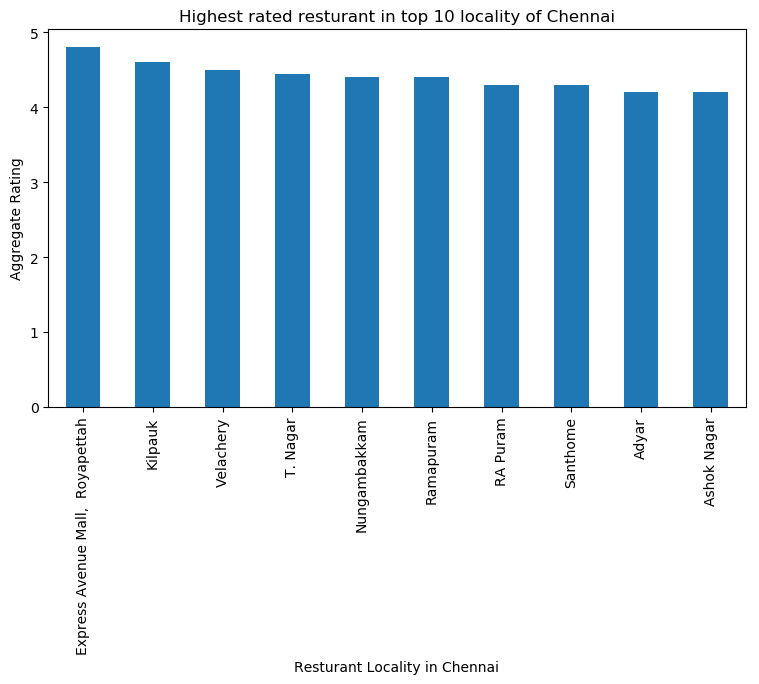

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Highest rated resturant in top 10 locality of Chennai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

#### QUESTION 2:

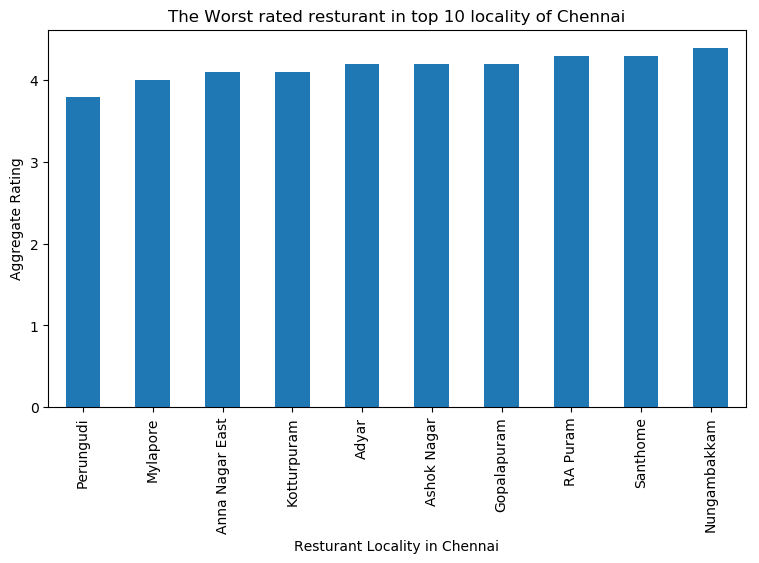

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Chennai')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

#### QUESTION 3:

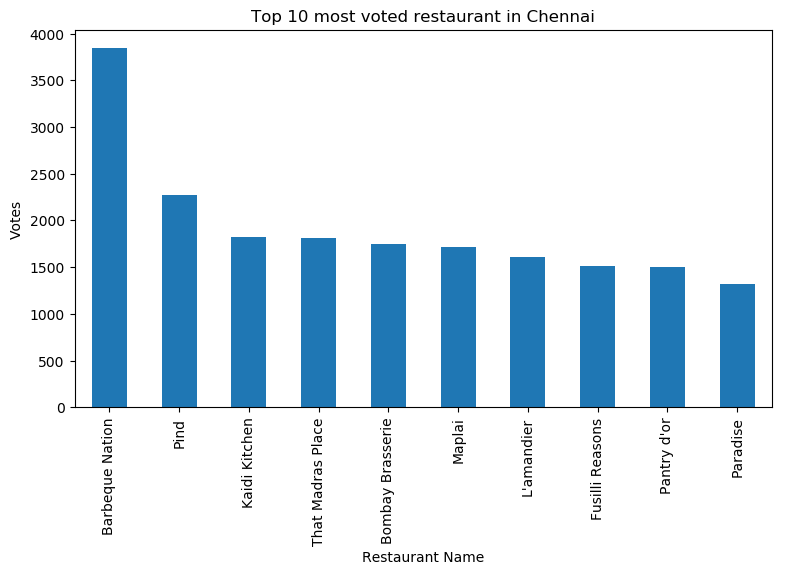

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Top 10 most voted restaurant in Chennai')
#On x-axis

#giving a bar plot
df_Res.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Restaurant Name')
#On y-axis
plt.ylabel('Votes')
#displays the plot
plt.show()

#### QUESTION 4:

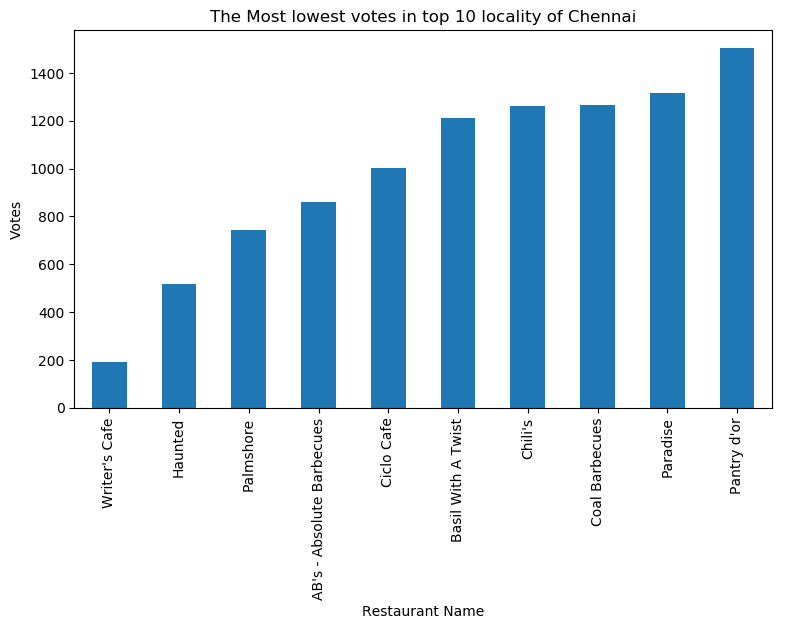

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Most lowest votes in top 10 locality of Chennai')
#On x-axis

#giving a bar plot

df_Res.groupby('Restaurant Name')['Votes'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Restaurant Name')
#On y-axis
plt.ylabel('Votes')

#displays the plot
plt.show()


#### QUESTION 5:

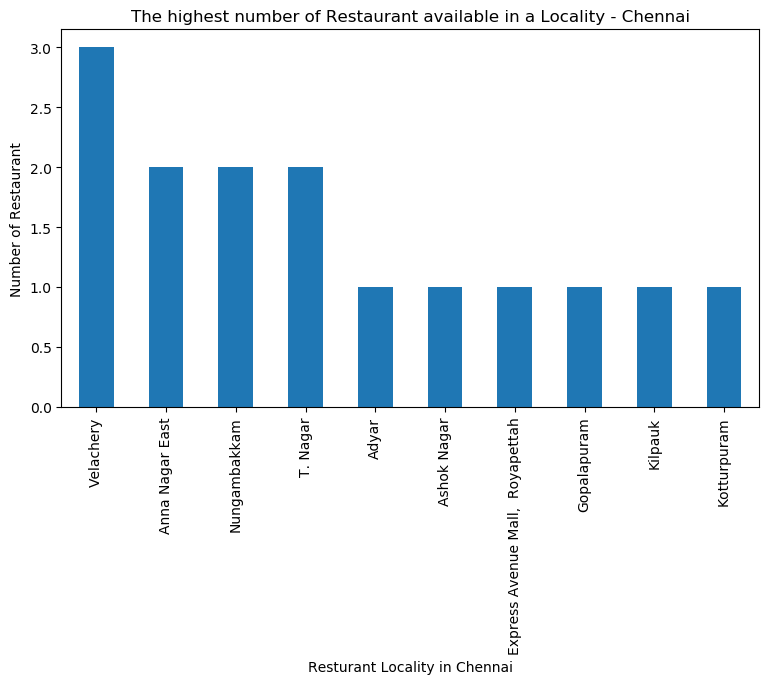

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in a Locality - Chennai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

#### QUESTION 6:

##  WE NEED MORE RESTAURANTS OVER HERE!!!

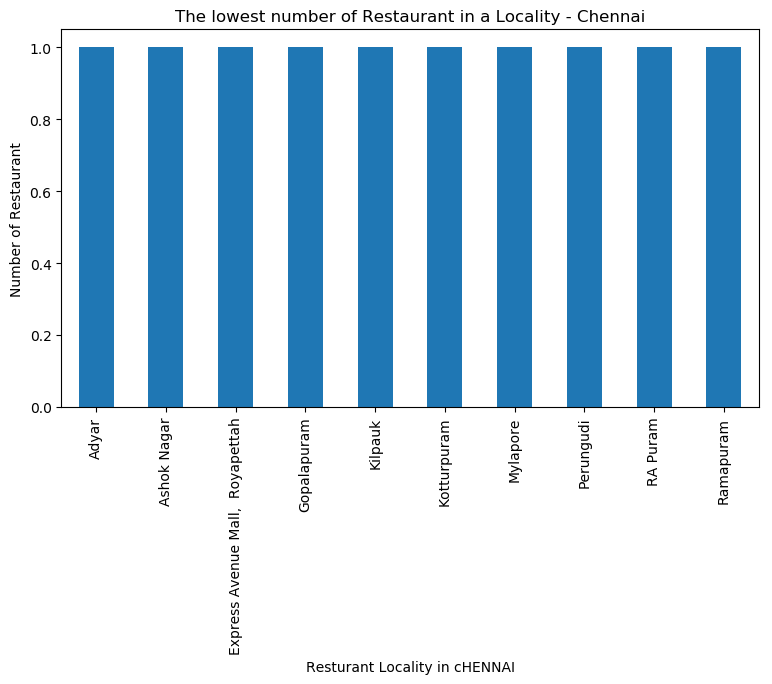

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant in a Locality - Chennai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in cHENNAI')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


#### QUESTION 7:

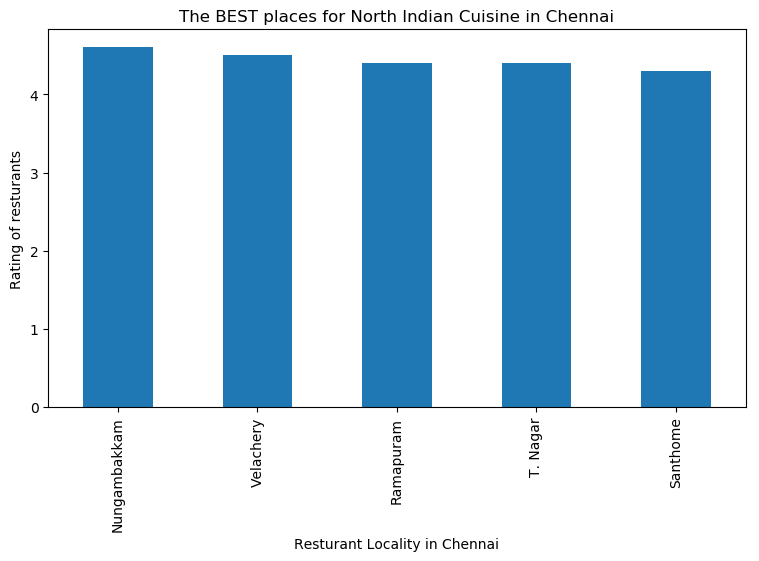

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The BEST places for North Indian Cuisine in Chennai')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

#### QUESTION 8:

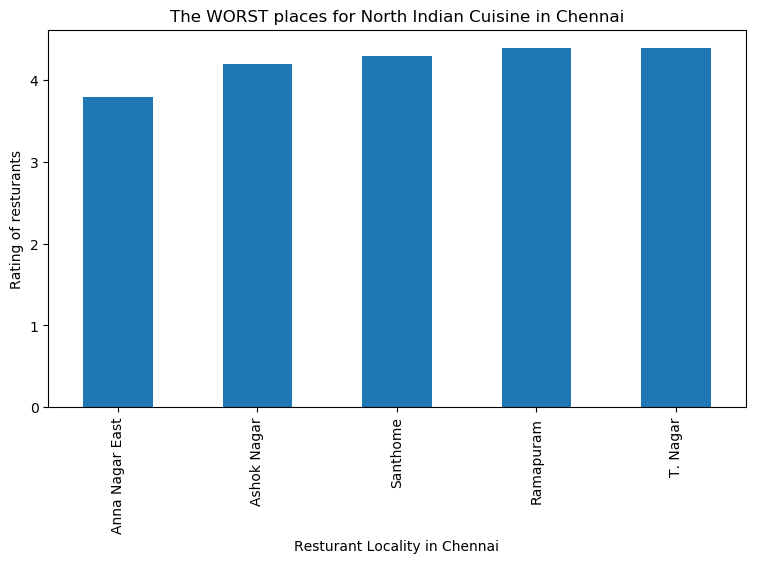

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The WORST places for North Indian Cuisine in Chennai')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nsmallest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

## Data Transformation

In [119]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_Chennai = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [120]:
df_Chennai = df_final[df_final['Aggregate rating'] != 0.000000]
df_Chennai.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_Chennai.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Adyar,13.005801,80.250744,1,"European, Italian, Desserts",4.2,Very Good,1810
1,Anna Nagar East,13.089124,80.219888,2,"North Indian, Chinese, Arabian, Continental, C...",4.1,"Good, Very Good",2023
2,Ashok Nagar,13.029780,80.208812,1,"North Indian, Mughlai, Chinese, South Indian",4.2,Very Good,841
3,"Express Avenue Mall, Royapettah",13.058616,80.264151,1,"Mexican, American, Tex-Mex, Burger",4.8,Excellent,1262
4,Gopalapuram,13.054347,80.257221,1,"Cafe, European",4.2,Very Good,191


In [121]:
df_Chennai.shape

(15, 8)

# FOURSQUARE CREDENTIALS & VERSION

In [122]:
CLIENT_ID = 'DPBYY4JUY3DU20ALPSUV4ONY2K1GOJJKJ1NIHBB32XEMOVYY' # Put Your Client Id
CLIENT_SECRET = '1MV443TYEP4HUO0WDUW5NQ5W10L2Y4G05NWG11WIR3NUGC5B' # Put You Client Secret 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: Hidden')
print('CLIENT_SECRET: Hidden')

Your credentails:
CLIENT_ID: Hidden
CLIENT_SECRET: Hidden


## REPEATING THE SAME FOR ALL THE LOCALITIES

In [126]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## FINDING VENUES IN ALL LOCALITIES OF CHENNAI :

In [128]:
Chennai_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Adyar
Anna Nagar East
Ashok Nagar
Express Avenue Mall,  Royapettah
Gopalapuram
Kilpauk
Kotturpuram
Mylapore
Nungambakkam
Perungudi
RA Puram
Ramapuram
Santhome
T. Nagar
Velachery


In [129]:
Chennai_venues.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adyar,13.005801,80.250744,That Madras Place,13.005848,80.250726,Café
1,Adyar,13.005801,80.250744,Anjappar,13.006757,80.250713,Indian Restaurant
2,Adyar,13.005801,80.250744,ibaco,13.005864,80.251764,Ice Cream Shop
3,Adyar,13.005801,80.250744,Wonton,13.005047,80.251690,Chinese Restaurant
4,Adyar,13.005801,80.250744,Odyssey Book Shop,13.006682,80.253469,Bookstore


In [130]:
Chennai_venues.groupby('Location').count()

,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Location,,,,,,
Adyar,23,23,23,23,23,23
Anna Nagar East,21,21,21,21,21,21
Ashok Nagar,8,8,8,8,8,8
"Express Avenue Mall, Royapettah",43,43,43,43,43,43
Gopalapuram,21,21,21,21,21,21
Kilpauk,12,12,12,12,12,12
Kotturpuram,8,8,8,8,8,8
Mylapore,30,30,30,30,30,30
Nungambakkam,23,23,23,23,23,23


In [131]:
print('There are {} uniques categories.'.format(len(Chennai_venues['Venue Category'].unique())))

There are 71 uniques categories.


## Analyze Each Locality

In [132]:
# one hot encoding
Chennai_onehot = pd.get_dummies(Chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Chennai_onehot['Location'] = Chennai_venues['Location'] 

# move Locality column to the first column
column_list = Chennai_onehot.columns.tolist()
column_number = int(column_list.index('Location'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Chennai_onehot = Chennai_onehot[column_list]

Chennai_onehot.head()

,Location,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,...,Shopping Mall,Snack Place,South Indian Restaurant,Steakhouse,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
Chennai_grouped = Chennai_onehot.groupby('Location').mean().reset_index()
Chennai_grouped

,Location,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,...,Shopping Mall,Snack Place,South Indian Restaurant,Steakhouse,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Adyar,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000
1,Anna Nagar East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
2,Ashok Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000
3,"Express Avenue Mall, Royapettah",0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,...,0.046512,0.000000,0.000000,0.023256,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000
4,Gopalapuram,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000
5,Kilpauk,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
6,Kotturpuram,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Mylapore,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000
8,Nungambakkam,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000
9,Perungudi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
Chennai_grouped.shape

(15, 72)

In [135]:
num_top_venues = 5

for hood in Chennai_grouped['Location']:
    print("----"+hood+"----")
    temp = Chennai_grouped[Chennai_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adyar----
                venue  freq
0   Indian Restaurant  0.26
1                Café  0.09
2        Dessert Shop  0.09
3      Ice Cream Shop  0.04
4  Italian Restaurant  0.04


----Anna Nagar East----
                       venue  freq
0          Indian Restaurant  0.19
1           Department Store  0.14
2                       Café  0.10
3  Middle Eastern Restaurant  0.05
4                  Gift Shop  0.05


----Ashok Nagar----
                            venue  freq
0               Indian Restaurant  0.25
1            Fast Food Restaurant  0.25
2                   Movie Theater  0.25
3   Vegetarian / Vegan Restaurant  0.12
4  Multicuisine Indian Restaurant  0.12


----Express Avenue Mall,  Royapettah----
                       venue  freq
0             Clothing Store  0.12
1       Fast Food Restaurant  0.07
2                  Juice Bar  0.07
3  Middle Eastern Restaurant  0.05
4                       Café  0.05


----Gopalapuram----
               venue  freq
0          Multipl

## putting that into a pandas dataframe

In [136]:
#write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## create the new dataframe and display the top 10 venues for each Locality

In [145]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Location_venues_sorted = pd.DataFrame(columns=columns)
Location_venues_sorted['Location'] = Chennai_grouped['Location']

for ind in np.arange(Chennai_grouped.shape[0]):
    Location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chennai_grouped.iloc[ind, :], num_top_venues)

Location_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Dessert Shop,Café,Ice Cream Shop,Pizza Place,Women's Store,Italian Restaurant,Fast Food Restaurant,Department Store,Movie Theater
1,Anna Nagar East,Indian Restaurant,Department Store,Café,Ice Cream Shop,Bistro,Flea Market,Fast Food Restaurant,Dessert Shop,Middle Eastern Restaurant,Park
2,Ashok Nagar,Indian Restaurant,Movie Theater,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,Yoga Studio,Electronics Store,Convenience Store,Department Store,Dessert Shop
3,"Express Avenue Mall, Royapettah",Clothing Store,Juice Bar,Fast Food Restaurant,Multiplex,Middle Eastern Restaurant,Café,Shopping Mall,Hotel,Movie Theater,Pizza Place
4,Gopalapuram,Multiplex,Indian Restaurant,Café,Movie Theater,Middle Eastern Restaurant,Bakery,Gaming Cafe,Pub,Vegetarian / Vegan Restaurant,Tea Room
5,Kilpauk,Indian Restaurant,Fast Food Restaurant,Yoga Studio,Pizza Place,Italian Restaurant,Shoe Store,Hotel,Gym / Fitness Center,Multiplex,Gaming Cafe
6,Kotturpuram,Grocery Store,Convenience Store,Department Store,Park,Café,South Indian Restaurant,Bakery,Flower Shop,Yoga Studio,Electronics Store
7,Mylapore,Indian Restaurant,Ice Cream Shop,Hotel,Concert Hall,Pizza Place,Grocery Store,Gym,Electronics Store,Lounge,Dessert Shop
8,Nungambakkam,Indian Restaurant,Department Store,Chinese Restaurant,Convenience Store,Theater,Asian Restaurant,Japanese Restaurant,Coffee Shop,Juice Bar,Multicuisine Indian Restaurant
9,Perungudi,Boutique,Sandwich Place,Indian Restaurant,Middle Eastern Restaurant,South Indian Restaurant,Donut Shop,Yoga Studio,Convenience Store,Department Store,Dessert Shop


## Cluster Locality-Run k-means to cluster the Locality into 5 clusters.

In [149]:
kclusters = 5

Chennai_clustering = Chennai_grouped.drop('Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Chennai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(15,)

# CREATE THE MAP!

In [153]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Chennai_merged['Latitude'],Chennai_merged['Longitude'],Chennai_merged['Locality'],Chennai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# EXAMINE CLUSTERS!

In [159]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 0,Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Latitude,Aggregate rating,Rating text,Votes,Cluster Labels
0,13.005801,4.2,Very Good,1810,0
1,13.089124,4.1,"Good, Very Good",2023,0
5,13.081878,4.6,Excellent,1510,0
7,13.044694,4.0,Very Good,1820,0
8,13.065471,4.4,"Excellent, Very Good",3467,0
10,13.027018,4.3,Very Good,1607,0
11,13.026279,4.4,Very Good,645,0
12,13.026286,4.3,Very Good,742,0
14,12.981219,4.5,"Excellent, Very Good",4398,0


# 2

In [161]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 1, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Latitude,Aggregate rating,Rating text,Votes,Cluster Labels
9,12.972793,3.8,Good,1317,1


# 3

In [162]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 2, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Latitude,Aggregate rating,Rating text,Votes,Cluster Labels
3,13.058616,4.80,Excellent,1262,2
4,13.054347,4.20,Very Good,191,2
13,13.047562,4.45,"Excellent, Very Good",5058,2


# 4

In [163]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] ==3 , Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Latitude,Aggregate rating,Rating text,Votes,Cluster Labels
2,13.02978,4.2,Very Good,841,3


# 5

In [164]:
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 4, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Latitude,Aggregate rating,Rating text,Votes,Cluster Labels
6,13.022394,4.1,Very Good,1004,4


# THAT'S IT! BYE!